In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
import seaborn as sns; sns.set_theme(color_codes=True)
import os
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.metrics
import sklearn.datasets
from matplotlib.patches import Patch
import warnings
import scipy
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")

In [2]:
import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
sns.set_style(style='white')

In [3]:
from sklearn.cluster import KMeans

### Load in TADs from Celllines and Histone Marks

In [15]:
GM12878_TADs = pd.read_csv("../TAD_Data/GSE63525_GM12878_primary+replicate_Arrowhead_domainlist.txt", delimiter = "\t")
GM12878_TADs["KMeans_Labels"] = GM12878_kmeans_labels_states
GM12878_TADs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5,KMeans_Labels
0,1,144835000,145835000,1,144835000,145835000,"255,255,0",0.55170,0.350090,0.268600,0.43080,0.53910,4
1,1,68985000,70260000,1,68985000,70260000,"255,255,0",0.34374,0.270840,0.295710,0.40022,0.50935,3
2,1,49365000,50810000,1,49365000,50810000,"255,255,0",1.05670,0.240080,0.241480,0.49497,0.68434,3
3,1,163360000,164895000,1,163360000,164895000,"255,255,0",1.15700,0.219040,0.243360,0.71738,0.60165,3
4,1,247800000,248395000,1,247800000,248395000,"255,255,0",0.33524,0.183090,0.273430,0.40819,0.40678,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,X,133940000,134045000,X,133940000,134045000,"255,255,0",0.82134,0.017177,0.019672,0.53636,0.55455,3
9270,X,24080000,24165000,X,24080000,24165000,"255,255,0",0.92837,0.022191,0.012027,0.65278,0.51389,3
9271,X,128865000,128960000,X,128865000,128960000,"255,255,0",0.97871,0.010819,0.021867,0.56667,0.67778,2
9272,X,13780000,13880000,X,13780000,13880000,"255,255,0",0.81775,0.014339,0.012749,0.55000,0.63000,1


In [7]:
common_TADs_meQTLs = pd.read_csv("../TAD_Data/common_TADs_meQTLs.csv")
#common_TADs_meQTLs = common_TADs_meQTLs.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1)
del common_TADs_meQTLs["#meqtl"]
common_TADs_meQTLs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K4me3,H3K27me3,H4K20me1,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.157722,0.167622,0.705304,4,71,141,950000,0.062006,0.021654,0.047834
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.139404,0.226065,0.369001,4,122,97,825000,0.075906,0.042846,0.037893
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.706817,0.275085,0.000000,4,90,194,340000,0.238009,0.076695,0.183891
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.694064,0.244738,0.000000,4,201,189,655000,0.131405,0.088911,0.092995
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.241590,0.499037,0.704529,0,26,22,205000,0.053005,0.036747,0.034587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.000000,0.000000,0.000000,0,0,0,205000,0.000000,0.000000,0.000000
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,0.570525,1.000000,0.000000,1,0,0,250000,0.000000,0.000000,0.000000
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.000000,0.000000,1.000000,1,0,0,235000,0.000000,0.000000,0.000000
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.000000,0.000000,0.000000,1,0,0,155000,0.000000,0.000000,0.000000


In [9]:
GM12878_enrichments_df = pd.read_csv("../TAD_Data/GM12878_enrichments.csv")
common_TADs_df = pd.read_csv("../TAD_Data/common_TADs_enrichments.csv")
common_TADs_df = common_TADs_df.drop(["Unnamed: 0"], axis=1)
GM12878_enrichments_df = GM12878_enrichments_df.drop(["Unnamed: 0"], axis = 1)
common_TADs_df

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies
0,0.000298,0.001788,0.000000,0.000000,0.001192,0.000000,0.014300,0.001490,0.014002,0.000000,0.000000,0.000000,0.012811,0.860698,0.508554
1,0.007075,0.022056,0.000000,0.021224,0.062423,0.002081,0.082399,0.002497,0.107368,0.002497,0.001248,0.004994,0.022472,0.574295,0.804013
2,0.000000,0.016897,0.000000,0.000000,0.070256,0.000000,0.119168,0.000000,0.026679,0.000000,0.000000,0.005336,0.034683,0.944450,0.294362
3,0.001929,0.005788,0.000000,0.054500,0.072346,0.000000,0.025562,0.000482,0.004341,0.001447,0.000000,0.000482,0.009646,0.643393,0.759629
4,0.038102,0.041566,0.003464,0.083132,0.289232,0.005196,0.244202,0.000000,0.055422,0.000000,0.000000,0.000000,0.000000,0.102184,0.912726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.012970,0.011349,0.000000,0.014591,0.695510,0.000000,0.058364,0.003242,0.035667,0.000000,0.000000,0.000000,0.000000,0.126456,0.703616
1096,0.004019,0.001005,0.000000,0.000000,0.000000,0.000000,0.008037,0.000000,0.005023,0.000000,0.000000,0.000000,0.004019,0.271253,0.962444
1097,0.021509,0.009056,0.000000,0.000000,0.217355,0.000000,0.091697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019245,0.971305
1098,0.095734,0.003481,0.000000,0.019147,0.107918,0.000000,0.006962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135768,0.979964


In [10]:
GM12878_enrichments = GM12878_enrichments_df.to_numpy()
common_TADs_enrichment = common_TADs_df.to_numpy()
common_TADs_enrichment

array([[2.97922545e-04, 1.78753527e-03, 0.00000000e+00, ...,
        1.28106694e-02, 8.60698233e-01, 5.08553784e-01],
       [7.07464459e-03, 2.20562449e-02, 0.00000000e+00, ...,
        2.24724005e-02, 5.74294679e-01, 8.04012550e-01],
       [0.00000000e+00, 1.68969346e-02, 0.00000000e+00, ...,
        3.46831815e-02, 9.44449712e-01, 2.94362387e-01],
       ...,
       [2.15090863e-02, 9.05645740e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.92449720e-02, 9.71305056e-01],
       [9.57335730e-02, 3.48122084e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.35767613e-01, 9.79963666e-01],
       [4.60534326e-02, 7.95468382e-02, 3.97734191e-02, ...,
        0.00000000e+00, 3.97734191e-02, 7.66161652e-01]])

### K-means Clustering to Categorize TADs Based on 15 Chromatin States

In [11]:
GM12878_kmeans_states = KMeans(n_clusters=5)
GM12878_kmeans_states.fit(GM12878_enrichments)

KMeans(n_clusters=5)

In [12]:
GM12878_kmeans_labels_states = GM12878_kmeans_states.labels_
GM12878_kmeans_labels_states

array([4, 3, 3, ..., 2, 1, 3])

In [13]:
GM12878_kmeans_colors_states = []
for lab in GM12878_kmeans_labels_states:
    if lab == 0:
        GM12878_kmeans_colors_states.append("mediumpurple")
    elif lab == 1:
        GM12878_kmeans_colors_states.append("grey")
    elif lab == 2:
        GM12878_kmeans_colors_states.append("deepskyblue")
    elif lab == 3:
        GM12878_kmeans_colors_states.append("orange")
    else:
        GM12878_kmeans_colors_states.append("red")
print(len(GM12878_kmeans_colors_states))

9274


In [17]:
GM12878_enrichments_df["KMeans_State_Labels"] = GM12878_kmeans_labels_states

In [18]:
labels_0_enrich = GM12878_enrichments_df[(GM12878_enrichments_df["KMeans_State_Labels"] == 0)]
labels_1_enrich = GM12878_enrichments_df[(GM12878_enrichments_df["KMeans_State_Labels"] == 1)]
labels_2_enrich = GM12878_enrichments_df[(GM12878_enrichments_df["KMeans_State_Labels"] == 2)]
labels_3_enrich = GM12878_enrichments_df[(GM12878_enrichments_df["KMeans_State_Labels"] == 3)]
labels_4_enrich = GM12878_enrichments_df[(GM12878_enrichments_df["KMeans_State_Labels"] == 4)]

In [19]:
frames = [labels_0_enrich, labels_1_enrich, labels_2_enrich, labels_3_enrich, labels_4_enrich]
sorted_dataframe_enrichments = pd.concat(frames)
sorted_dataframe_enrichments

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies,KMeans_State_Labels
76,0.093785,0.089483,0.040439,0.554106,0.579919,0.064531,0.113575,0.019790,0.020650,0.00086,0.001721,0.006883,0.045602,0.505063,0.251241,0
112,0.035443,0.095857,0.016916,0.703222,0.625086,0.066053,0.140161,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.008055,0.282739,0
135,0.246889,0.179193,0.007964,0.477849,0.657042,0.059731,0.489795,0.000000,0.015928,0.00000,0.000000,0.000000,0.000000,0.000000,0.055749,0
138,0.068092,0.105543,0.006809,0.522607,0.612829,0.049367,0.191509,0.051920,0.020428,0.00000,0.001702,0.006809,0.001702,0.033195,0.540481,0
186,0.035521,0.087083,0.008021,0.833015,0.338018,0.071041,0.120312,0.011458,0.060729,0.00000,0.000000,0.000000,0.000000,0.331143,0.223436,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,0.060688,0.032129,0.000000,0.221331,0.521199,0.024989,0.078537,0.000000,0.021419,0.00000,0.000000,0.000000,0.000000,0.103526,0.810358,4
9253,0.213651,0.014010,0.014010,0.000000,0.693491,0.000000,0.042030,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.686486,4
9256,0.124573,0.006921,0.000000,0.027683,0.579032,0.000000,0.013841,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.805108,4
9263,0.144210,0.033279,0.000000,0.055465,0.754330,0.025884,0.099838,0.000000,0.014791,0.00000,0.000000,0.000000,0.000000,0.000000,0.628609,4


In [187]:
sorted_dataframe_enrichments = sorted_dataframe_enrichments.drop(["KMeans_States_Labels", "KMeans_State_Labels"], axis = 1)
sorted_dataframe_enrichments

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies
0,0.069406,0.069840,0.005205,0.120593,0.439862,0.013447,0.114087,0.011279,0.034269,0.000434,0.006073,0.005639,0.137077,0.350502,0.791232
34,0.055600,0.059032,0.000000,0.087175,0.392630,0.008923,0.129046,0.004805,0.037066,0.000000,0.011669,0.006864,0.041185,0.437933,0.787319
38,0.044552,0.035641,0.028216,0.200483,0.386115,0.029701,0.135140,0.009653,0.130685,0.006683,0.001485,0.000743,0.004455,0.391313,0.785596
39,0.001521,0.018248,0.000000,0.003802,0.484341,0.000000,0.082117,0.006083,0.110250,0.000000,0.000000,0.000000,0.000000,0.007603,0.863754
41,0.032231,0.025516,0.002014,0.425048,0.342456,0.016116,0.039617,0.008058,0.064462,0.000000,0.001343,0.000000,0.000671,0.468694,0.688940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205,0.008838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002525,0.000000,0.010101,0.992378,0.122469
9225,0.006914,0.000000,0.000000,0.000000,0.000000,0.000000,0.004609,0.000000,0.119837,0.000000,0.000000,0.002305,0.066832,0.854991,0.500089
9245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030925,0.002811,0.255833,0.000000,0.000000,0.000000,0.000000,0.826538,0.500421
9265,0.021217,0.003031,0.000000,0.000000,0.000000,0.000000,0.021217,0.000000,0.048496,0.000000,0.000000,0.000000,0.021217,0.906273,0.418280


In [20]:
GM12878_TADs["KMeans_State_Labels"] = GM12878_kmeans_labels_states
GM12878_labels_0 = GM12878_TADs[GM12878_TADs["KMeans_State_Labels"] == 0]
GM12878_labels_1 = GM12878_TADs[GM12878_TADs["KMeans_State_Labels"] == 1]
GM12878_labels_2 = GM12878_TADs[GM12878_TADs["KMeans_State_Labels"] == 2]
GM12878_labels_3 = GM12878_TADs[GM12878_TADs["KMeans_State_Labels"] == 3]
GM12878_labels_4 = GM12878_TADs[GM12878_TADs["KMeans_State_Labels"] == 4]
GM12878_frames = [GM12878_labels_0, GM12878_labels_1, GM12878_labels_2, GM12878_labels_3, GM12878_labels_4]
GM12878_sorted_labels_df = pd.concat(GM12878_frames)
GM12878_sorted_labels = np.array(GM12878_sorted_labels_df["KMeans_State_Labels"])

In [21]:
GM12878_kmeans_colors_states_sorted = []
for lab in GM12878_sorted_labels:
    if lab == 0:
        GM12878_kmeans_colors_states_sorted.append("mediumpurple")
    elif lab == 1:
        GM12878_kmeans_colors_states_sorted.append("grey")
    elif lab == 2:
        GM12878_kmeans_colors_states_sorted.append("deepskyblue")
    elif lab == 3:
        GM12878_kmeans_colors_states_sorted.append("orange")
    else:
        GM12878_kmeans_colors_states_sorted.append("red")
print(len(GM12878_kmeans_colors_states_sorted))

9274


### Draw Heatmap of Clustered TADs for GM12878 Cellline and the Common TAD Cellline

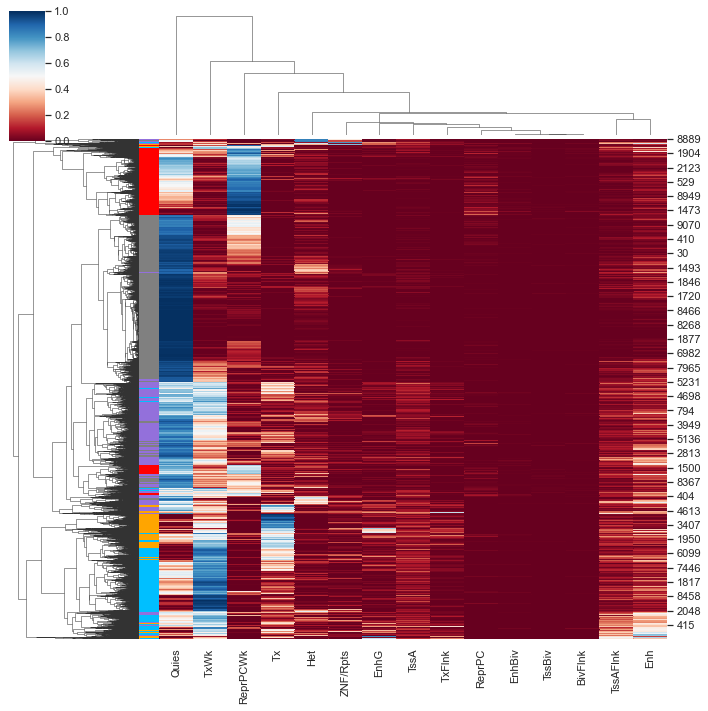

In [152]:
GM12878_clustermap_states = sns.clustermap(GM12878_enrichments_df, cmap="RdBu",row_cluster = True, row_colors = GM12878_kmeans_colors_states)
GM12878_clustermap_states

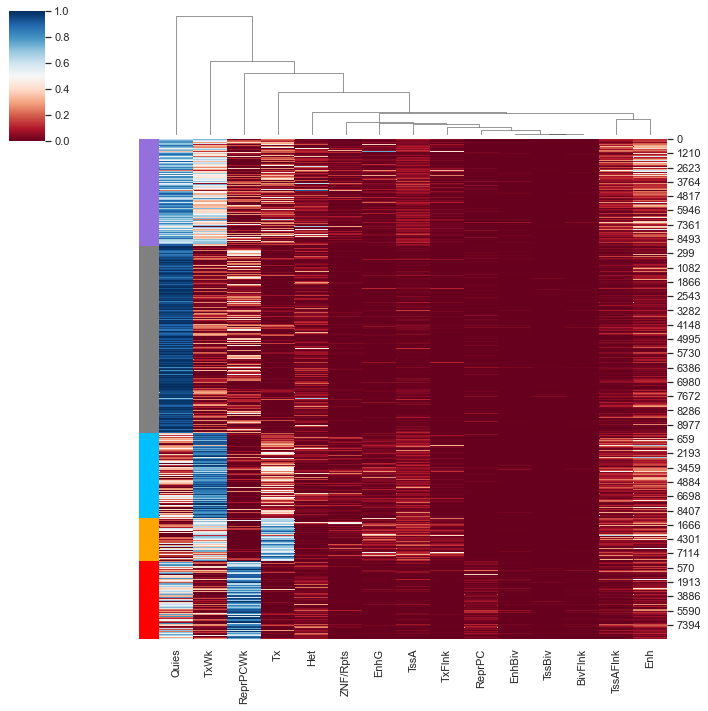

In [198]:
GM12878_clustermap_states_sorted = sns.clustermap(sorted_dataframe_enrichments, cmap="RdBu",row_cluster = False, row_colors = GM12878_kmeans_colors_states_sorted)
GM12878_clustermap_states_sorted

In [22]:
common_TADs_labels = np.array(common_TADs_meQTLs["KMeans_State_Labels"])
common_TADs_df["KMeans_States_Labels"] = common_TADs_labels
common_TADs_0 = common_TADs_df[common_TADs_df["KMeans_States_Labels"] == 0]
common_TADs_1 = common_TADs_df[common_TADs_df["KMeans_States_Labels"] == 1]
common_TADs_2 = common_TADs_df[common_TADs_df["KMeans_States_Labels"] == 2]
common_TADs_3 = common_TADs_df[common_TADs_df["KMeans_States_Labels"] == 3]
common_TADs_4 = common_TADs_df[common_TADs_df["KMeans_States_Labels"] == 4]
common_TADs_frames = [common_TADs_0, common_TADs_1, common_TADs_2, common_TADs_3, common_TADs_4]
common_TADs_enrichment_sorted = pd.concat(common_TADs_frames)
common_TADs_enrichment_sorted

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies,KMeans_States_Labels
4,0.038102,0.041566,0.003464,0.083132,0.289232,0.005196,0.244202,0.000000,0.055422,0.000000,0.000000,0.000000,0.000000,0.102184,0.912726,0
12,0.069083,0.233346,0.027633,0.254838,0.419102,0.099786,0.270190,0.139701,0.085970,0.000000,0.000000,0.000000,0.000000,0.052196,0.766050,0
18,0.024443,0.054441,0.000000,0.106661,0.527748,0.001111,0.155547,0.009999,0.000000,0.000000,0.000000,0.000000,0.000000,0.209988,0.798845,0
21,0.064477,0.242862,0.017194,0.012895,0.431993,0.004298,0.257907,0.060178,0.126804,0.000000,0.006448,0.002149,0.000000,0.000000,0.814555,0
23,0.012826,0.089780,0.000000,0.000000,0.646413,0.000000,0.371944,0.041042,0.130822,0.005130,0.012826,0.000000,0.010261,0.092345,0.638718,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004205,0.000000,0.050454,0.000000,0.000000,0.000000,0.004205,0.870338,0.489828,4
1065,0.048953,0.088431,0.030003,0.222656,0.184757,0.023687,0.137384,0.023687,0.023687,0.006316,0.004737,0.007896,0.041057,0.851146,0.397938,4
1074,0.015968,0.017109,0.000000,0.018249,0.015968,0.000000,0.006843,0.000000,0.014827,0.001141,0.004562,0.017109,0.258909,0.960358,0.094667,4
1081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002941,0.000000,0.000000,0.000000,0.025488,0.861676,0.506810,4


In [23]:
commonTADs_labels_sorted = np.array(common_TADs_enrichment_sorted["KMeans_States_Labels"])
common_TADs_enrichment_sorted = common_TADs_enrichment_sorted.drop(["KMeans_States_Labels"], axis = 1)
commonTADs_kmeans_colors_states_sorted = []
for lab in commonTADs_labels_sorted:
    if lab == 0:
        commonTADs_kmeans_colors_states_sorted.append("mediumpurple")
    elif lab == 1:
        commonTADs_kmeans_colors_states_sorted.append("grey")
    elif lab == 2:
        commonTADs_kmeans_colors_states_sorted.append("deepskyblue")
    elif lab == 3:
        commonTADs_kmeans_colors_states_sorted.append("orange")
    else:
        commonTADs_kmeans_colors_states_sorted.append("red")
print(len(commonTADs_kmeans_colors_states_sorted))

1100


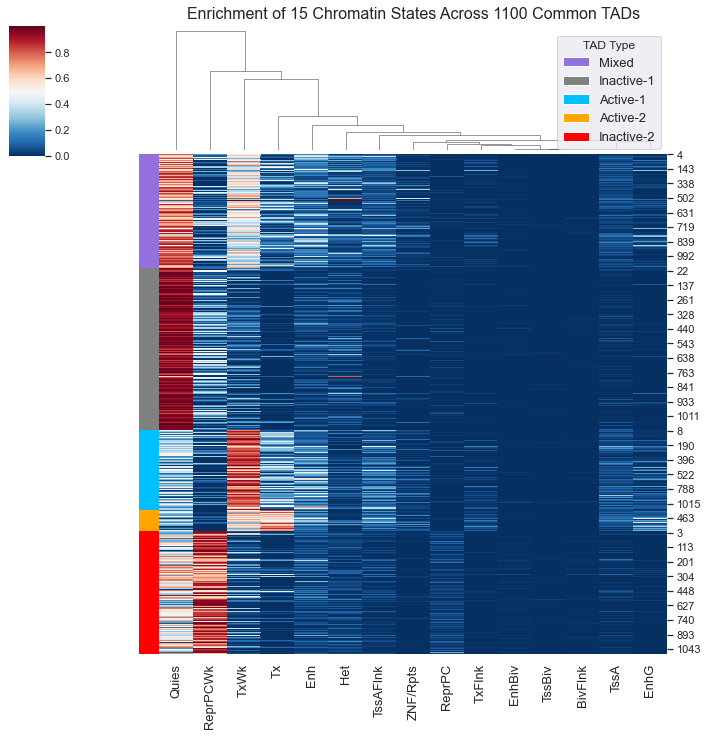

In [46]:

commonTADs_clustermap_states_sorted = sns.clustermap(common_TADs_enrichment_sorted, cmap="RdBu_r",row_cluster = False, row_colors = commonTADs_kmeans_colors_states_sorted)

handles = [Patch(facecolor="mediumpurple",label='Mixed'),
                   Patch(facecolor="grey",label='Inactive-1'),
                   Patch(facecolor="deepskyblue",label='Active-1'), 
                   Patch(facecolor="orange",label='Active-2'),
                   Patch(facecolor="red",label='Inactive-2')]
#fig, ax = plt.subplots()
#plt.title("Enrichment of 15 Chromatin States Across 1100 TADs")
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(15,10)})
commonTADs_clustermap_states_sorted.ax_heatmap.legend(handles=handles, bbox_to_anchor=(1,1.25), title='TAD Type', 
                                                      loc='upper right', fontsize=13)
# commonTADs_clustermap_states_sorted.fig.suptitle('Enrichment of 15 Chromatin States Across 1100 TADs', fontsize=16)
commonTADs_clustermap_states_sorted.ax_col_dendrogram.set_title("Enrichment of 15 Chromatin States Across 1100 Common TADs", fontsize=16)
commonTADs_clustermap_states_sorted.ax_heatmap.set_xticklabels(commonTADs_clustermap_states_sorted.ax_heatmap.get_xmajorticklabels(), fontsize = 13)
plt.savefig("../Carter-Lab-Datasets/Figures/tad_clustering_heatmap.png", bbox_inches='tight')
# commonTADs_clustermap_states_sorted.figure.savefig("../Carter-Lab-Datasets/Figures/tad_clustering_heatmap.png")
